In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("haberman.csv")

# Univariate EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     305 non-null    int64
 1   Year    305 non-null    int64
 2   Nodes   305 non-null    int64
 3   Status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
df.describe()

,Age,Year,Nodes,Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
df.head()

,Age,Year,Nodes,Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


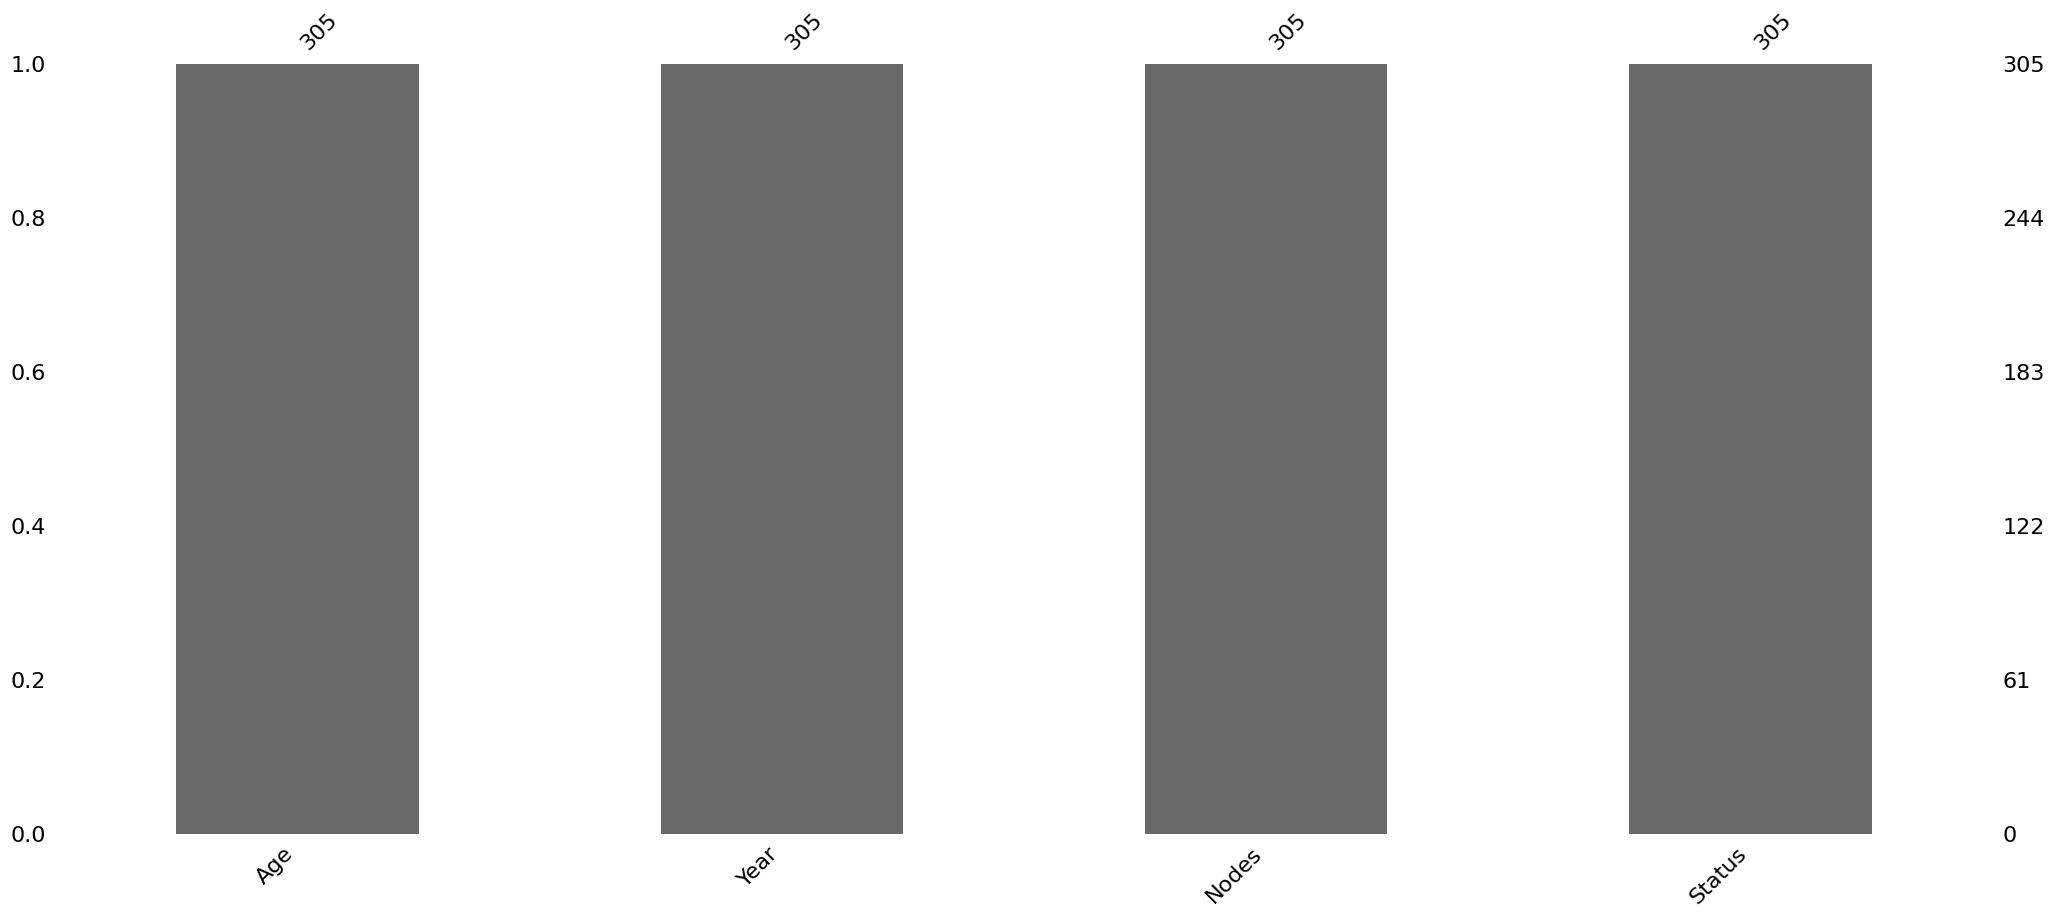

In [6]:
## null count analysis before modelling to keep check
import missingno as msno
p=msno.bar(df)

In [7]:
df.isnull().values.any()

False

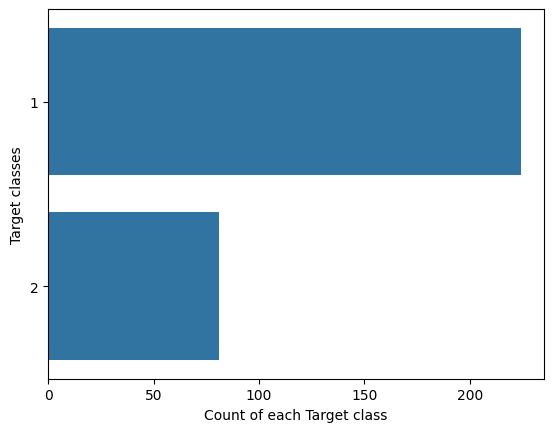

In [8]:
sns.countplot(y=df.Status ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### Now some deeper explorations!

# Bivariate EDA

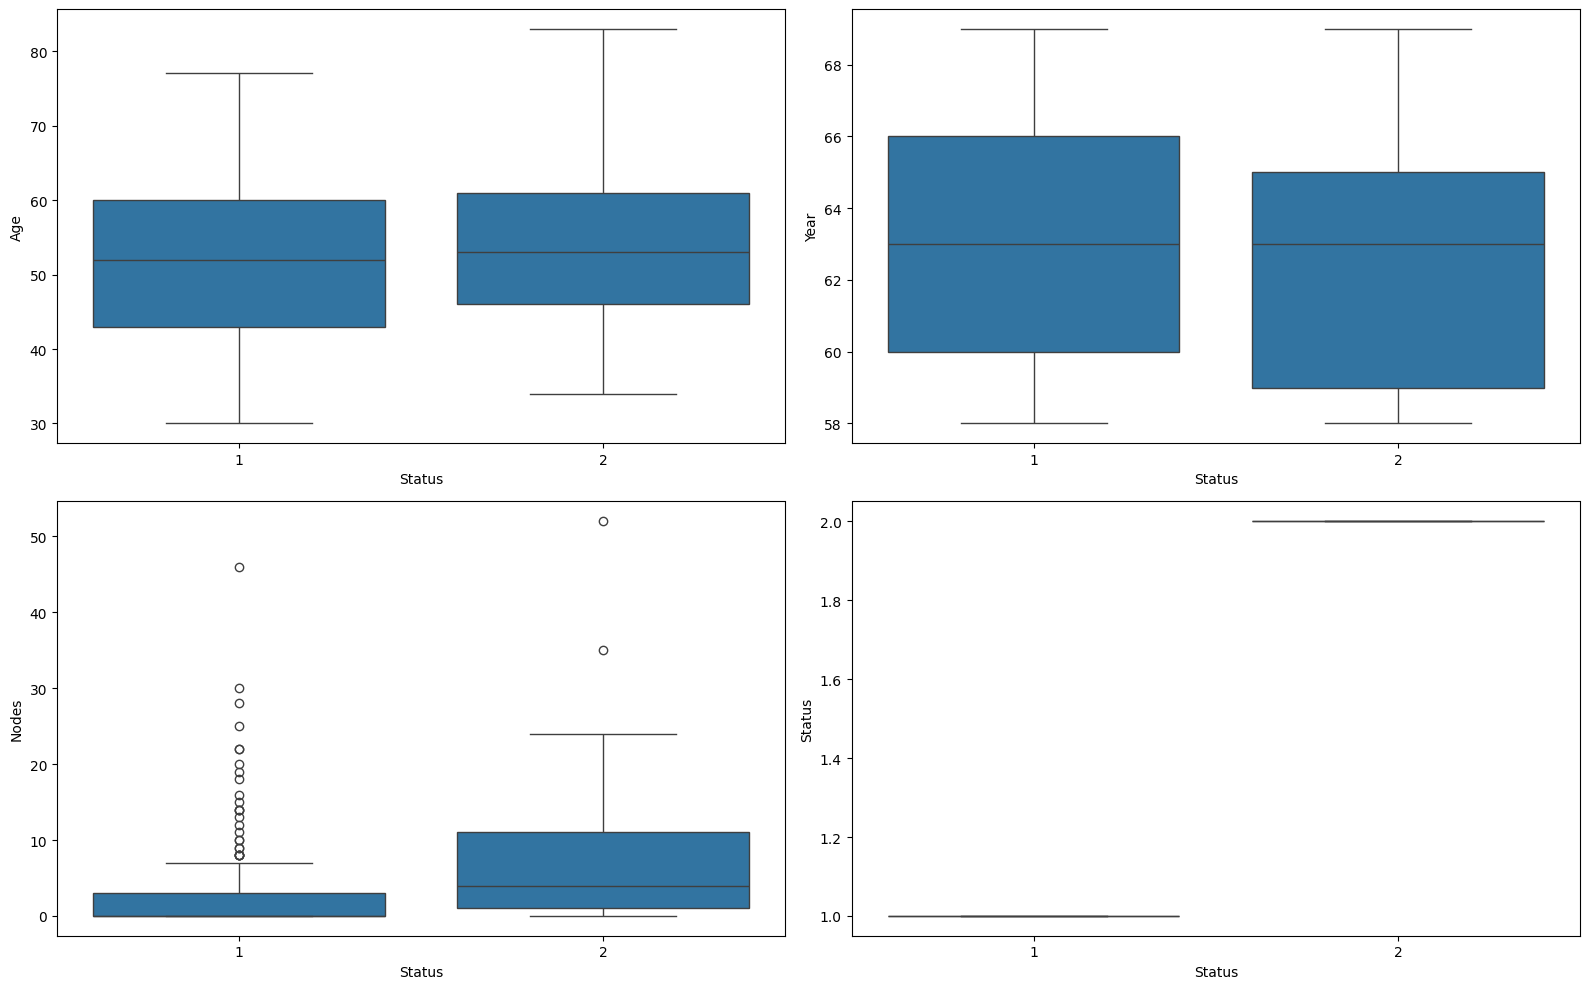

In [13]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns)):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Status'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

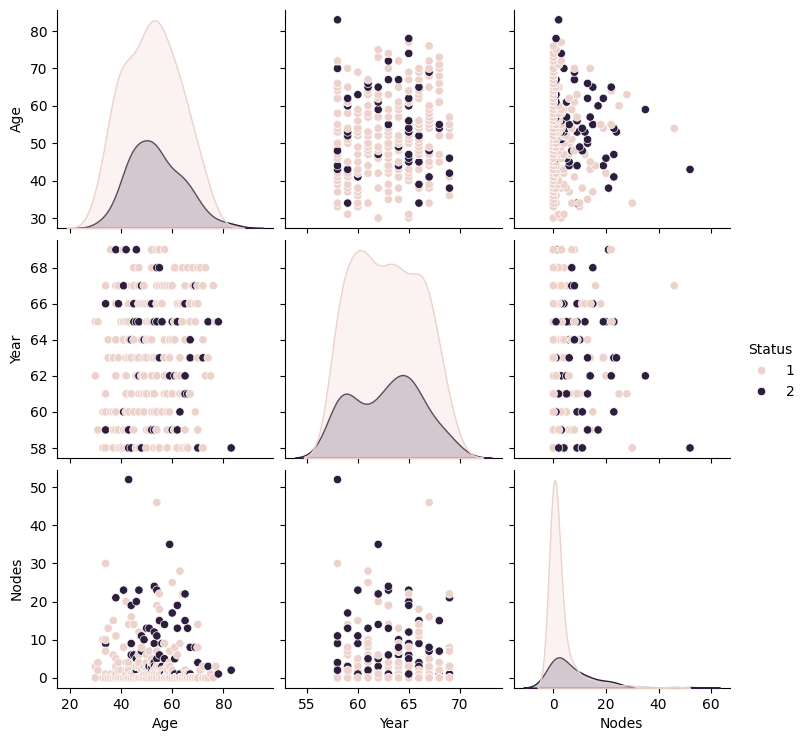

In [10]:
p=sns.pairplot(df, hue = 'Status')

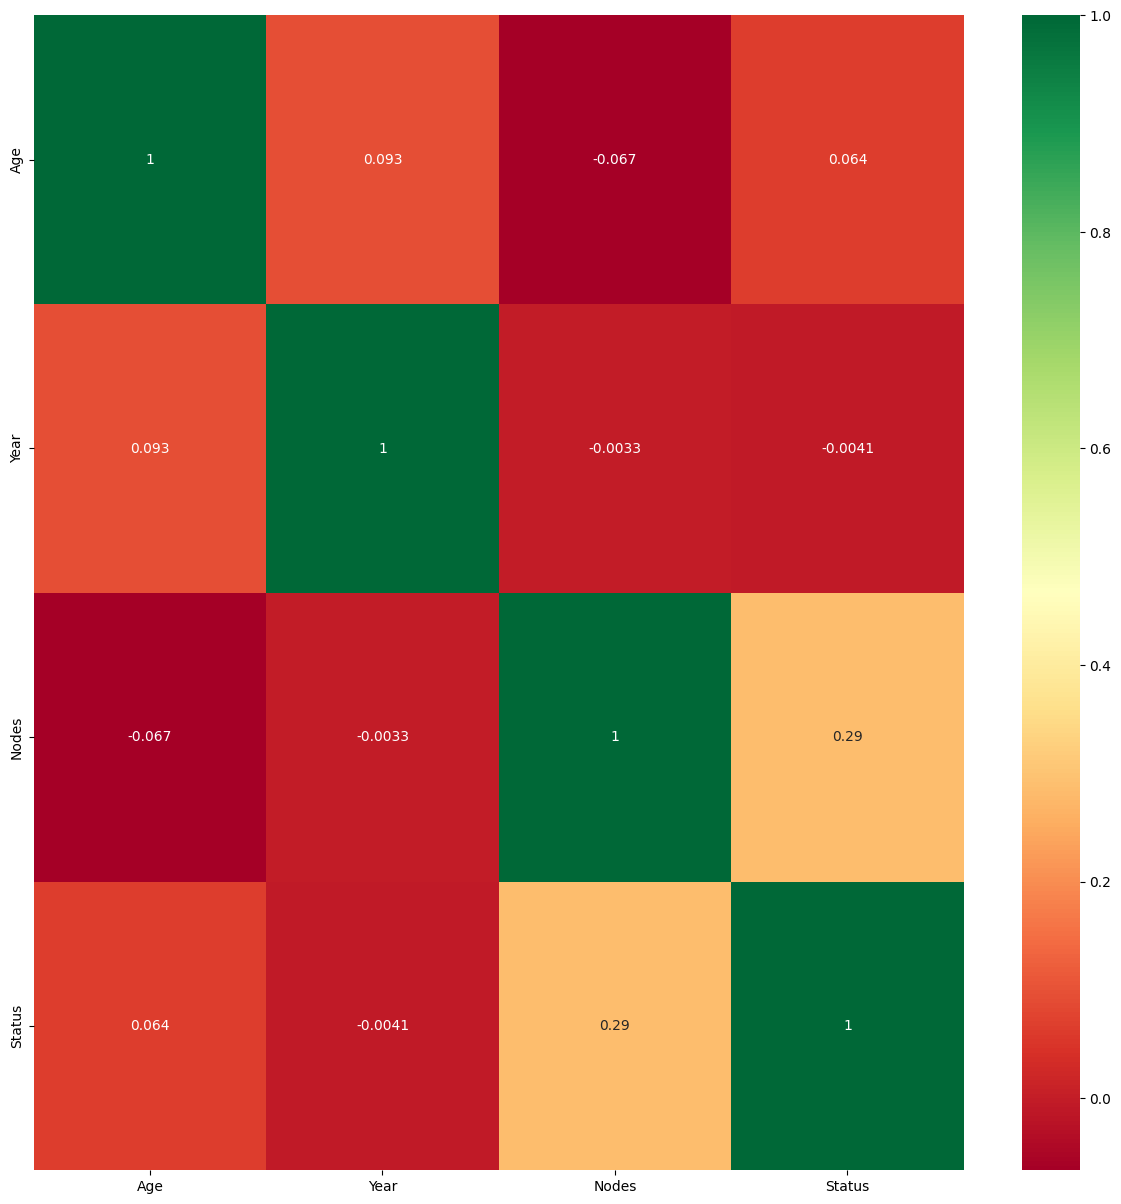

In [14]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn') 

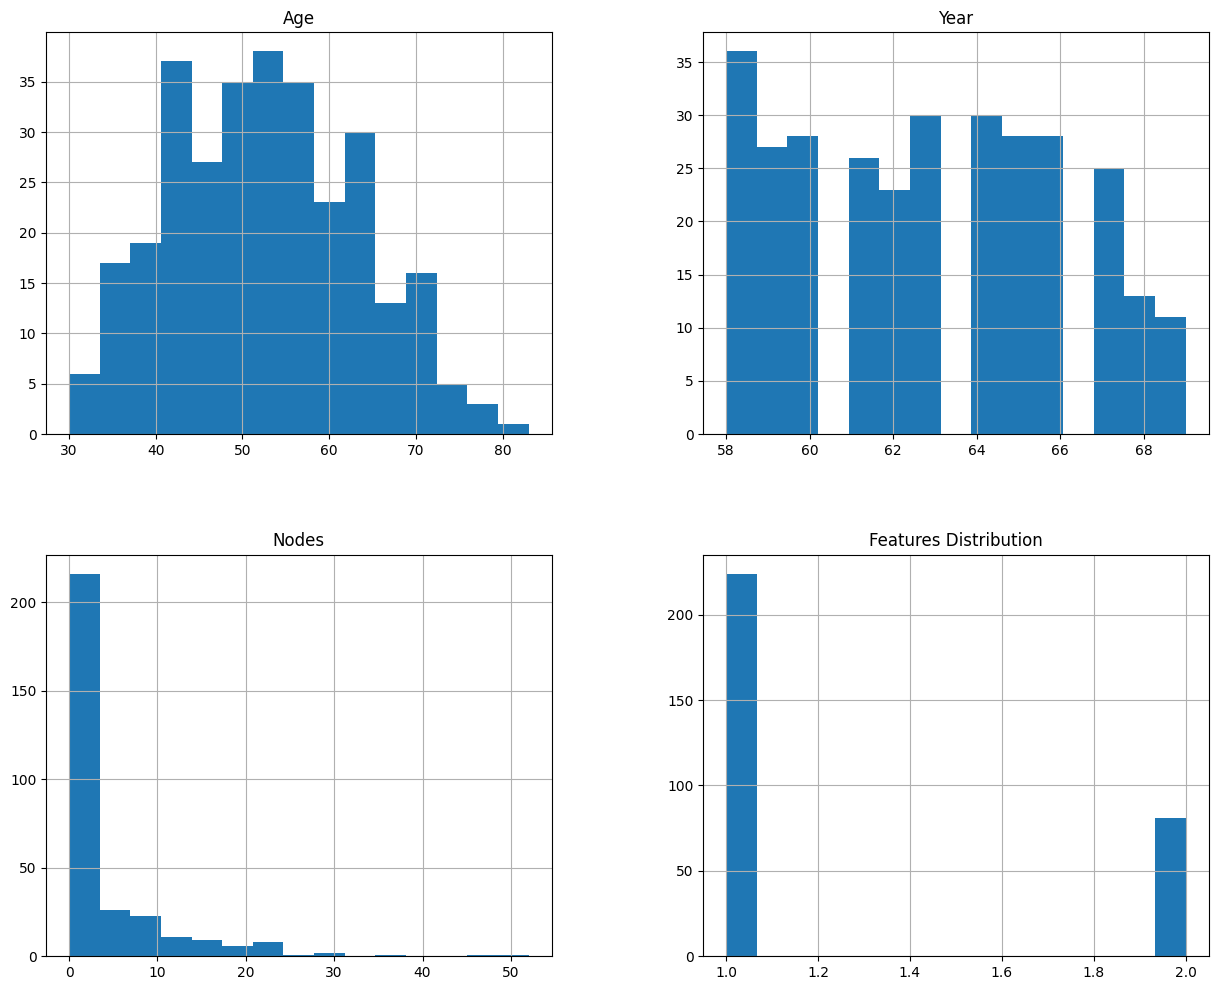

In [15]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

## Modelling

# 1. Without PCA

In [17]:
X = df.drop(['Status'],axis=1)
y = df.Status

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [23]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.7183098591549296 %
Test score before PCA 0.7608695652173914 %


# 2. With PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [25]:
pca.get_covariance()

array([[ 0.04109436,  0.00555449, -0.00186775],
       [ 0.00555449,  0.08751257, -0.00013423],
       [-0.00186775, -0.00013423,  0.01916824]])

In [26]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.59664808, 0.27471993, 0.12863199])

In [32]:
# with plt.style.context('dark_background'):
#     plt.figure(figsize=(6, 4))

#     plt.bar(range(4), explained_variance, alpha=0.5, align='center',
#             label='individual explained variance')
#     plt.ylabel('Explained variance ratio')
#     plt.xlabel('Principal components')
#     plt.legend(loc='best')
#     plt.tight_layout()

In [33]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [34]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [35]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.7136150234741784 %
Test score after PCA 0.7608695652173914 %


C:\Users\RealTime\AppData\Local\Temp\ipykernel_6632\1819296938.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


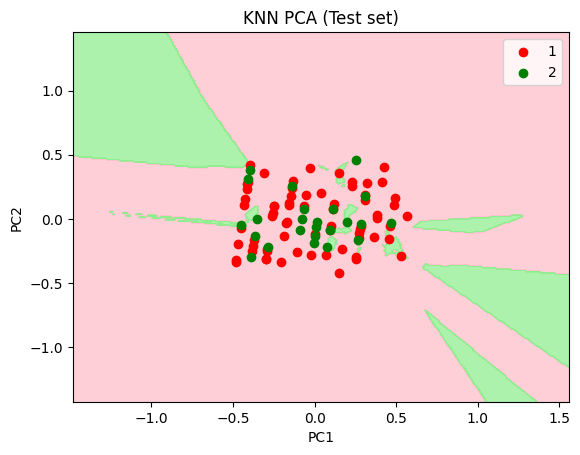

In [36]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()